<a href="https://colab.research.google.com/github/Saiharshi1/ores5160-2025/blob/main/Week_11_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1 — Work with CSV (Population Data)**

In [34]:
#import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
#Read using csv module
with open("est2018-pop-res.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    rows = [next(reader) for _ in range(5)]
    print(header)
    print(rows)


['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
[['010', '0', '0', '00', 'United States', '327167434', '253768092', '77.6'], ['040', '3', '6', '01', 'Alabama', '4887871', '3798031', '77.7'], ['040', '4', '9', '02', 'Alaska', '737438', '553622', '75.1'], ['040', '4', '8', '04', 'Arizona', '7171646', '5528989', '77.1'], ['040', '3', '7', '05', 'Arkansas', '3013825', '2310645', '76.7']]


In [36]:
#Read using pandas.read_csv()
df = pd.read_csv("est2018-pop-res.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


In [6]:
#Show shape and columns
df.shape, df.columns

((53, 8),
 Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018',
        'POPEST18PLUS2018', 'PCNT_POPEST18PLUS'],
       dtype='object'))

In [37]:
# Keep only state-level rows (SUMLEV == 40)
df_states = df[df["SUMLEV"] == 40].copy()

In [38]:
#Top 5 most populous states
df_states.nlargest(5, "POPESTIMATE2018")[["NAME", "POPESTIMATE2018"]]

,NAME,POPESTIMATE2018
5,California,39557045
44,Texas,28701845
10,Florida,21299325
33,New York,19542209
39,Pennsylvania,12807060


### Q1 Summary
- CSV loaded successfully using both csv and pandas.
- Column for total population: POPESTIMATE2018.
- Top 5 most populous states: California, Texas, Florida, New York, Pennsylvania.


**Q2 — Basic Stats + Plot**


In [39]:
#Average population
df_states["POPESTIMATE2018"].mean()


np.float64(6353126.673076923)

In [40]:
# Convert REGION to int first
df_states["REGION"] = pd.to_numeric(df_states["REGION"], errors="coerce")

region_map = {1:"Northeast", 2:"Midwest", 3:"South", 4:"West"}

region_pop = (
    df_states
      .assign(REGION_NAME=lambda d: d["REGION"].map(region_map).fillna("Other"))
      .groupby("REGION_NAME")["POPESTIMATE2018"]
      .sum()
      .sort_values(ascending=False)
)
region_pop


,POPESTIMATE2018
REGION_NAME,
South,124753948
West,77993663
Midwest,68308744
Northeast,56111079
Other,3195153


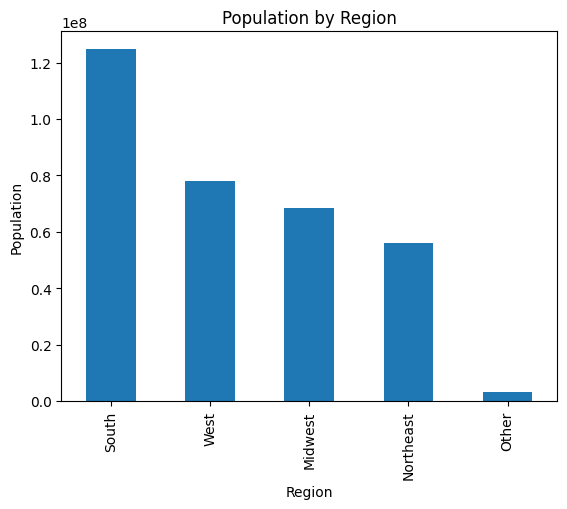

In [41]:
#Bar chart
region_pop.plot(kind="bar")
plt.title("Population by Region")
plt.ylabel("Population")
plt.xlabel("Region")
plt.show()




### Q2 Summary
- Average population across states ≈ 6.35 million.
- Region with highest total population: South.
- Bar chart displays population by region.


**Q3 — Work with FHIR JSON Patient File**

In [42]:
# Load the Json file
import json

with open("patient.json") as f:
    patient = json.load(f)


In [43]:
#Extract name, gender, birthdate
name = patient["name"][0]   # official name entry
full_name = " ".join(name["given"]) + " " + name["family"]

gender = patient["gender"]
birth = patient["birthDate"]

full_name, gender, birth


('Peter James Chalmers', 'male', '1974-12-25')

In [44]:
#Extract address
address = patient["address"][0]
city = address["city"]
state = address["state"]
postal = address["postalCode"]

city, state, postal


('PleasantVille', 'Vic', '3999')

In [45]:
#Phone count and types
phones = [t for t in patient["telecom"] if t.get("system") == "phone"]
len(phones), phones


(3,
 [{'system': 'phone', 'value': '(03) 5555 6473', 'use': 'work', 'rank': 1},
  {'system': 'phone', 'value': '(03) 3410 5613', 'use': 'mobile', 'rank': 2},
  {'system': 'phone',
   'value': '(03) 5555 8834',
   'use': 'old',
   'period': {'end': '2014'}}])

### Q3 Summary
- Patient: Peter James Chalmers, Male, born 1974-12-25.
- Address: PleasantVille, Vic 3999.
- 3 phone numbers (work, mobile, old).
